#### Importation des librairies

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#### Aperçu des données

In [4]:
# Chemin du fichier input
input_path = 'C:/Users/Visiteur/Desktop/Projets Data/data-science-portfolio/Scoring-et-Segmentation-Client/data/assurance1.csv'

# Chargement des données
df = pd.read_csv(input_path, sep=',',header=0,index_col=0)

# Visualisons les premieres lignes
df.head()


,nbmaisons,nbpers_au_foyer,type_client,catholique,protestant,autre_religion,sans_religion,marie,concubin,autre_relation,...,auto0,assur_sante_public,assur_sante_prive,revenu1,revenu2,revenu3,revenu4,revenu5,revenu_moyen,pouvoir_achat
cle,,,,,,,,,,,,,,,,,,,,,
1,1,3,8,0,5,1,3,7,0,2,...,1,8,1,0,4,5,0,0,4,3
2,1,2,8,1,4,1,4,6,2,2,...,2,6,3,2,0,5,2,0,5,4
3,1,2,8,0,4,2,4,3,2,4,...,2,9,0,4,5,0,0,0,3,4
4,1,3,3,2,3,2,4,5,2,2,...,0,7,2,1,5,3,0,0,4,4
5,1,4,10,1,4,1,4,7,1,2,...,1,5,4,0,0,9,0,0,6,3


#### Dimension de la base de donnée

In [8]:
print(f"il y'a : {df.shape[0]} individus et {df.shape[1]} variables dans notre base")

il y'a : 5822 individus et 36 variables dans notre base


#### Liste des colonnes et leurs types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 1 to 5822
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   nbmaisons           5822 non-null   int64
 1   nbpers_au_foyer     5822 non-null   int64
 2   type_client         5822 non-null   int64
 3   catholique          5822 non-null   int64
 4   protestant          5822 non-null   int64
 5   autre_religion      5822 non-null   int64
 6   sans_religion       5822 non-null   int64
 7   marie               5822 non-null   int64
 8   concubin            5822 non-null   int64
 9   autre_relation      5822 non-null   int64
 10  celibataire         5822 non-null   int64
 11  sans_enfant         5822 non-null   int64
 12  avec_enfant         5822 non-null   int64
 13  niv_etude_haut      5822 non-null   int64
 14  niv_etud_moy        5822 non-null   int64
 15  niv_etud_bas        5822 non-null   int64
 16  PCStop              5822 non-null   int64


#### Statistiques descriptive globale

In [12]:
df.describe()

,nbmaisons,nbpers_au_foyer,type_client,catholique,protestant,autre_religion,sans_religion,marie,concubin,autre_relation,...,auto0,assur_sante_public,assur_sante_prive,revenu1,revenu2,revenu3,revenu4,revenu5,revenu_moyen,pouvoir_achat
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,1.110615,2.678805,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,0.883545,2.290450,...,1.959464,6.277053,2.728959,2.573686,3.536070,2.731364,0.796118,0.202679,3.784438,4.236345
std,0.405842,0.789835,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,0.965924,1.722645,...,1.599714,1.978675,1.981893,2.086099,1.882656,1.927738,1.162829,0.551557,1.317783,2.007150
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,0.000000,1.000000,...,1.000000,5.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,3.000000,3.000000
50%,1.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,1.000000,2.000000,...,2.000000,7.000000,2.000000,2.000000,4.000000,3.000000,0.000000,0.000000,4.000000,4.000000
75%,1.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,1.000000,3.000000,...,3.000000,8.000000,4.000000,4.000000,5.000000,4.000000,1.000000,0.000000,4.000000,6.000000
max,10.000000,5.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,7.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000


#### Distribution des valeurs manquantes par colonne

In [13]:
missing_ratio = df.isnull().mean() * 100
print(missing_ratio.sort_values(ascending=False))


nbmaisons             0.0
nbpers_au_foyer       0.0
PCSouvr_quali         0.0
PCSouvr               0.0
locataire             0.0
proprietaire          0.0
auto1                 0.0
auto2                 0.0
auto0                 0.0
assur_sante_public    0.0
assur_sante_prive     0.0
revenu1               0.0
revenu2               0.0
revenu3               0.0
revenu4               0.0
revenu5               0.0
revenu_moyen          0.0
PCSinter              0.0
PCSagri               0.0
PCScadre              0.0
concubin              0.0
type_client           0.0
catholique            0.0
protestant            0.0
autre_religion        0.0
sans_religion         0.0
marie                 0.0
autre_relation        0.0
PCStop                0.0
celibataire           0.0
sans_enfant           0.0
avec_enfant           0.0
niv_etude_haut        0.0
niv_etud_moy          0.0
niv_etud_bas          0.0
pouvoir_achat         0.0
dtype: float64


#### L'occurence des variables

In [19]:
# liste des variables
col=df.columns.tolist()

# On affiche l'occurence de chaque variable
for col in col: # on parcour la liste de nos variables

    print(df[col].value_counts(),'\n')

1     5267
2      505
3       39
7        5
4        2
10       1
5        1
8        1
6        1
Name: nbmaisons, dtype: int64 

3    2646
2    2131
4     693
1     284
5      68
Name: nbpers_au_foyer, dtype: int64 

8     1563
3      886
9      667
5      569
1      552
7      550
2      502
10     276
6      205
4       52
Name: type_client, dtype: int64 

0    3228
1    1599
2     733
3     152
4      66
5      18
6      13
7       6
9       4
8       3
Name: catholique, dtype: int64 

4    1607
5    1501
6     714
3     590
7     564
2     396
9     173
1     134
0      78
8      65
Name: protestant, dtype: int64 

1    2014
0    2003
2    1388
3     257
4     132
5      28
Name: autre_religion, dtype: int64 

3    1453
4    1334
2    1055
5     963
0     456
1     230
6     217
7     101
9       8
8       5
Name: sans_religion, dtype: int64 

7    1683
6    1172
5     946
9     794
8     361
4     324
3     246
2     157
1      75
0      64
Name: marie, dtype: int64 

0    2448


#### Etude des correlations entre les variables

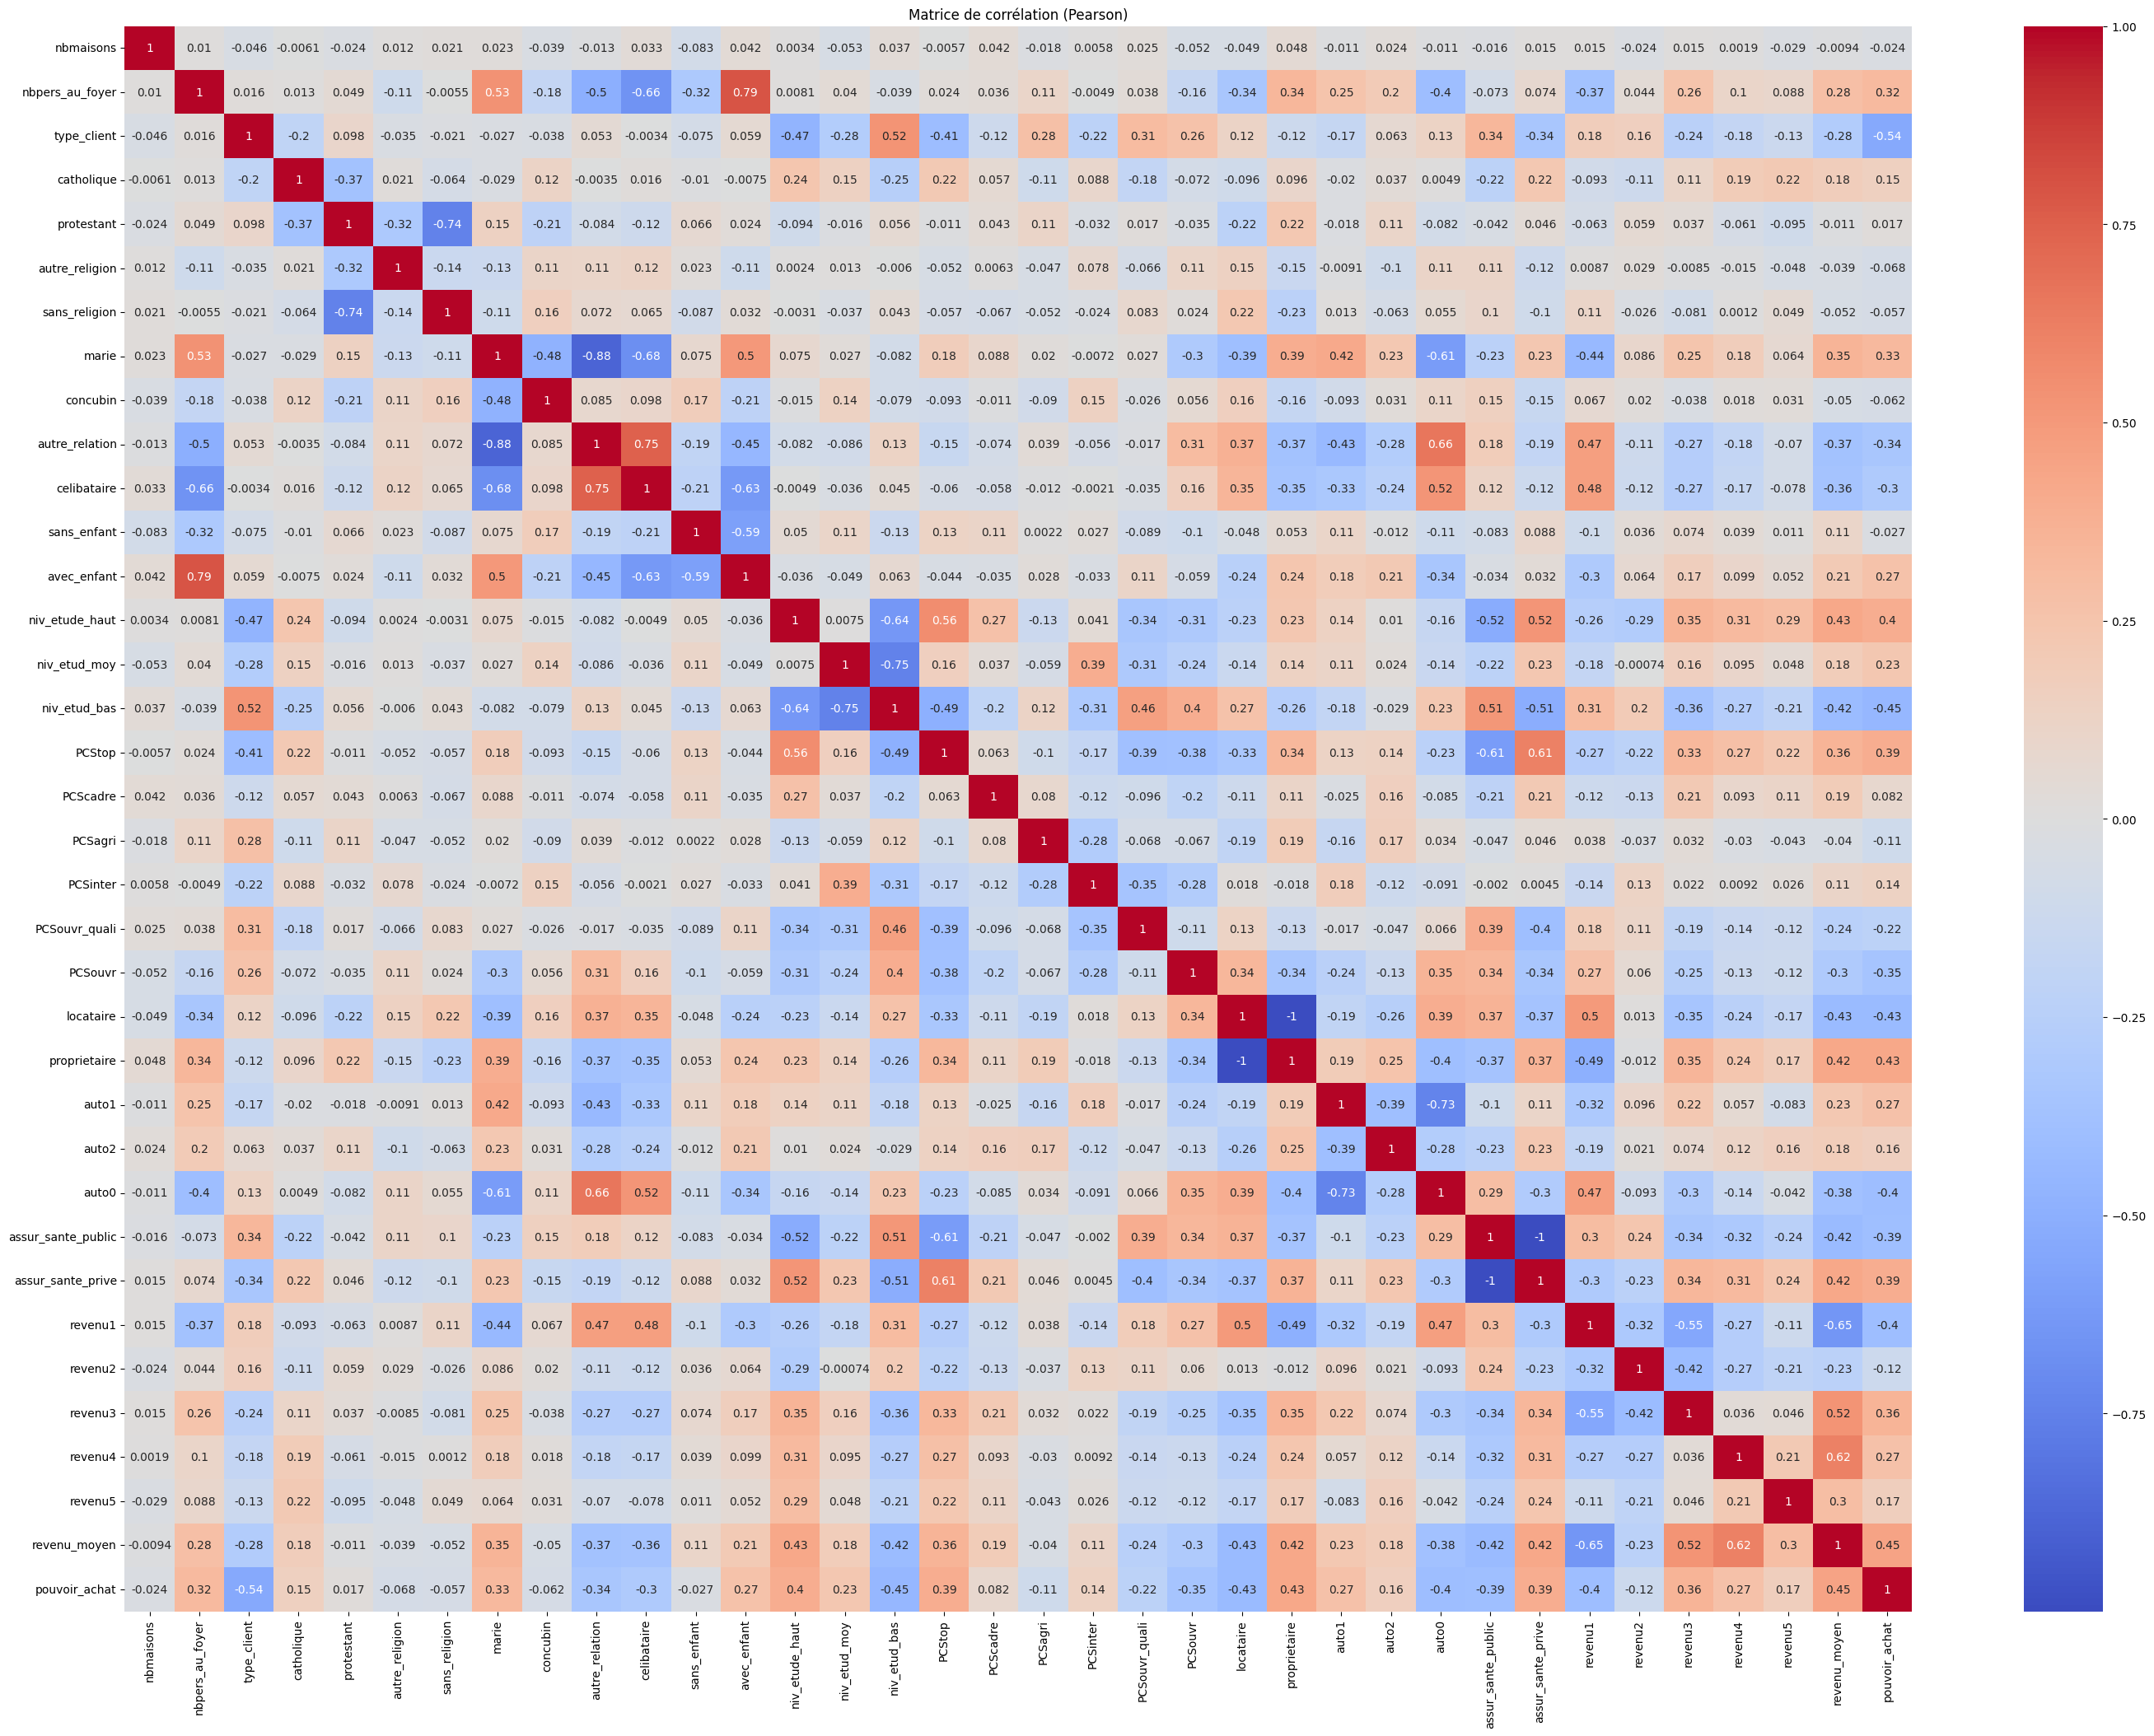

In [10]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

# Visualisation
plt.figure(figsize=(35, 25))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation (Pearson)")
plt.show()


In [15]:
#X : un dataframe qui ne contient que des variables quantitatives
matcor=df.corr() 
#nbre de variables à traiter
nbrevarexp=df.shape[1]
#nom des variables
listevarexp=df.columns
#préparation du dataframe qui contiendra : les coefficients de corrélation, la valeur absolue de ce coef et les noms des deux variables considérées
corrligne=pd.DataFrame(columns=["corr","abscorr","nom1","nom2"],index=range(0,nbrevarexp*(nbrevarexp-1)//2))
#calcul de tous les coefficients nécessaires (matrice symétrique)
val=0
for i in range(0,nbrevarexp-1):
    for j in range(i+1,nbrevarexp):
        corrligne["corr"][val]=matcor[listevarexp[i]][listevarexp[j]]
        corrligne["abscorr"][val]=abs(matcor[listevarexp[i]][listevarexp[j]])
        corrligne["nom1"][val]=listevarexp[i]
        corrligne["nom2"][val]=listevarexp[j]
        val+=1
#trie des valeurs de facon décroissante
corr=corrligne.sort_values(by="abscorr",ascending=False)
corr.head(20)

,corr,abscorr,nom1,nom2
539,-0.999554,0.999554,locataire,proprietaire
594,-0.999239,0.999239,assur_sante_public,assur_sante_prive
225,-0.884362,0.884362,marie,autre_relation
45,0.794014,0.794014,nbpers_au_foyer,avec_enfant
399,-0.747582,0.747582,niv_etud_moy,niv_etud_bas
279,0.745642,0.745642,autre_relation,celibataire
135,-0.741895,0.741895,protestant,sans_religion
565,-0.734564,0.734564,auto1,auto0
226,-0.684233,0.684233,marie,celibataire
295,0.661458,0.661458,autre_relation,auto0


#### Liste des variables numeriques et catégorielles

In [19]:
# Liste des variables catégorielle
cat_var=['catholique', 
         'protestant', 
         'autre_religion', 
         'sans_religion', 
         'marie', 
         'concubin', 
         'autre_relation', 
         'celibataire', 
         'sans_enfant', 
         'avec_enfant', 
         'niv_etude_haut', 
         'niv_etud_moy', 
         'niv_etud_bas', 
         'PCStop', 
         'PCScadre', 
         'PCSagri', 
         'PCSinter', 
         'PCSouvr_quali', 
         'PCSouvr', 
         'locataire', 
         'proprietaire', 
         'auto1', 
         'auto2', 
         'auto0', 
         'assur_sante_public', 
         'assur_sante_prive', 
         'revenu1', 
         'revenu2', 
         'revenu3', 
         'revenu4', 
         'revenu5']


# Liste des variables numerique
num_var=['nbpers_au_foyer',
         'revenu_moyen',
         'pouvoir_achat']

#### Analyse Univariée

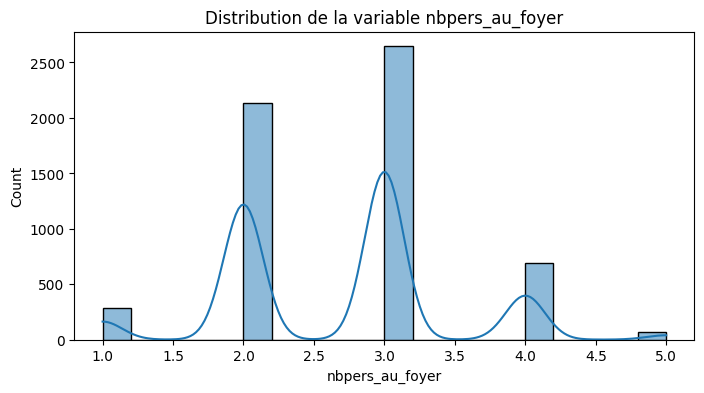

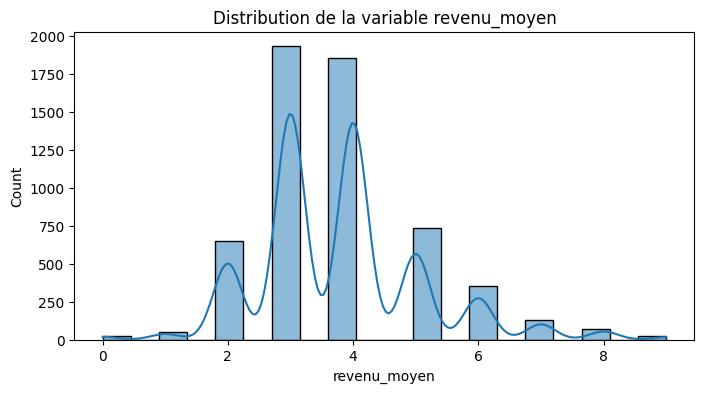

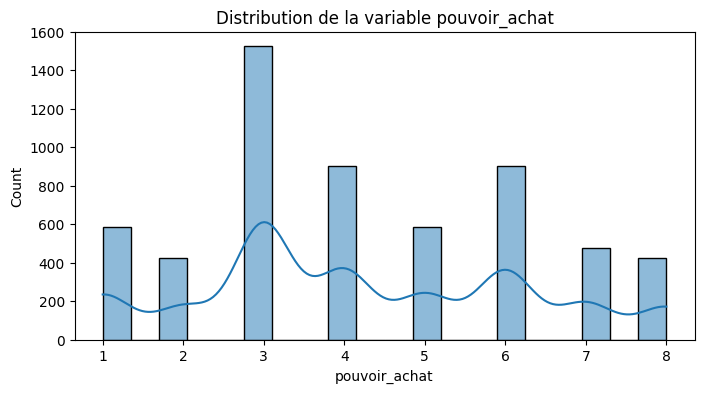

In [18]:
# Distribution des variables numériques
for col in num_var:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution de la variable {col}")
    plt.show()

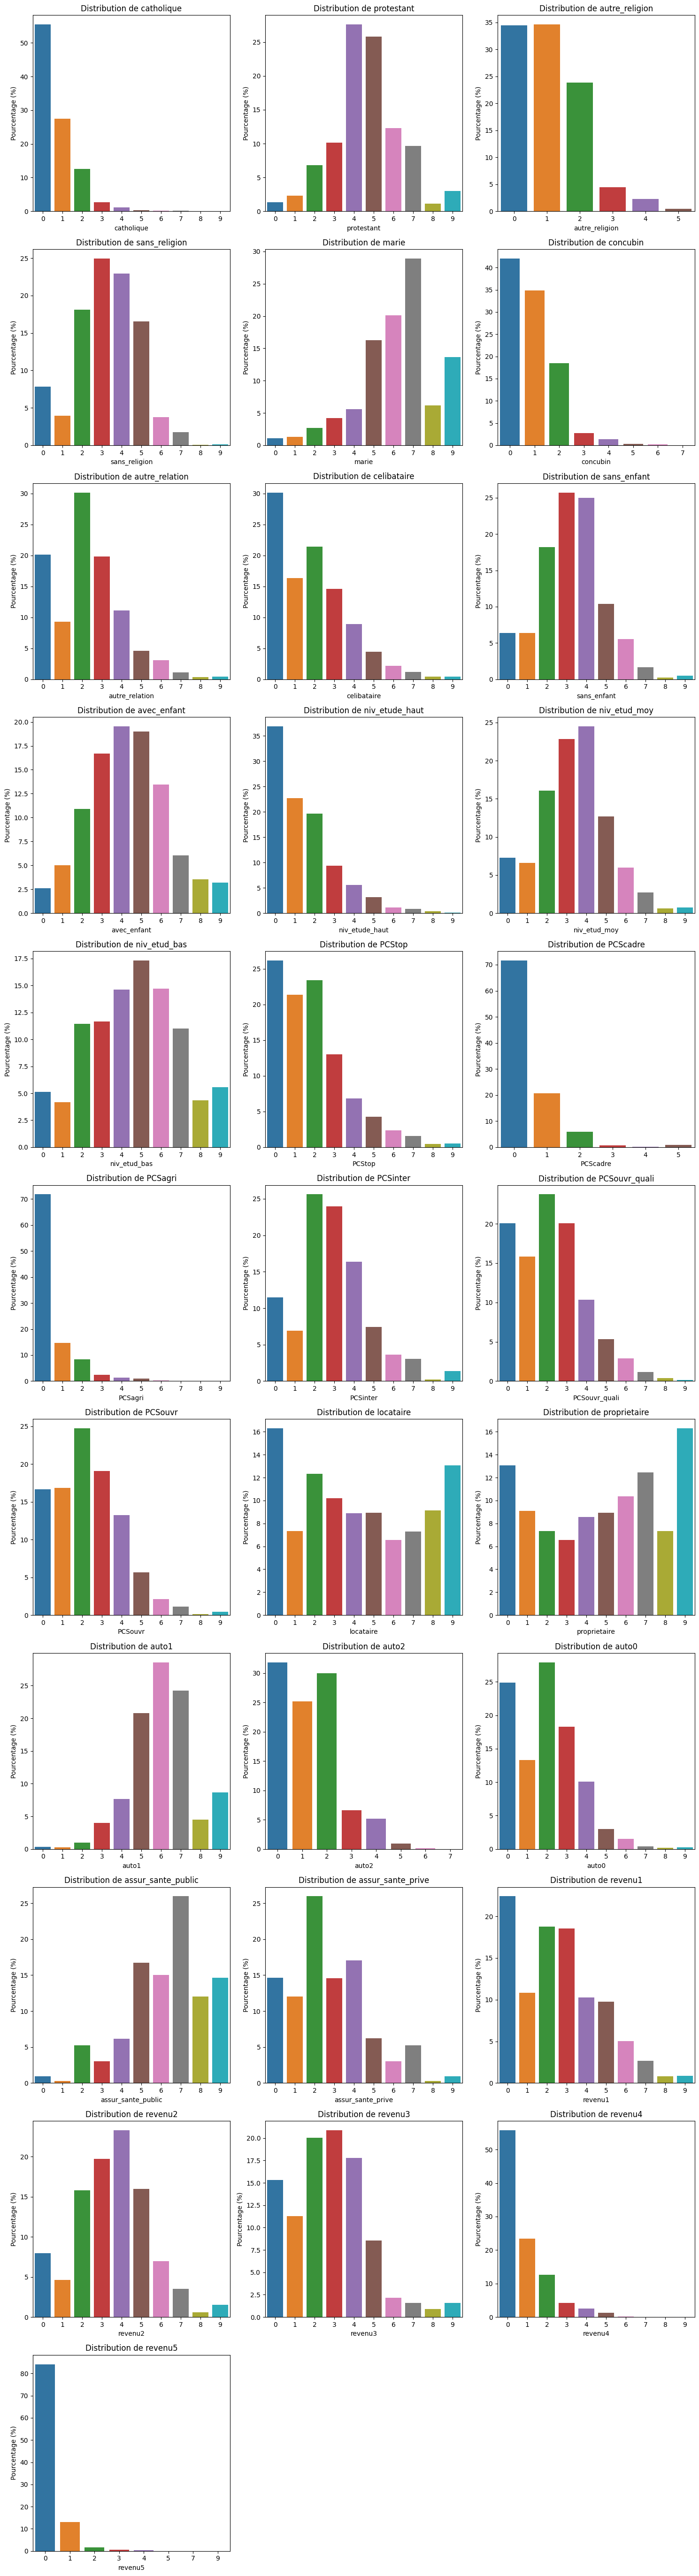

In [22]:
# Subplots pour les variables catégorielles
n = len(cat_var)
cols = 3  # Nombre de colonnes dans les subplots
rows = (n + cols - 1) // cols  # Calcul du nombre de lignes nécessaires

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Aplatir la grille d'axes pour un accès plus simple

for i, col in enumerate(cat_var):
    ax = axes[i]
    # Calcul des pourcentages
    percentages = (df[col].value_counts(normalize=True) * 100).sort_index()
    sns.barplot(x=percentages.index, y=percentages.values, ax=ax)
    ax.set_title(f"Distribution de {col}")
    ax.set_ylabel("Pourcentage (%)")
    ax.set_xlabel(col)

# Supprime les axes inutilisés si le nombre de graphiques est inférieur aux subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

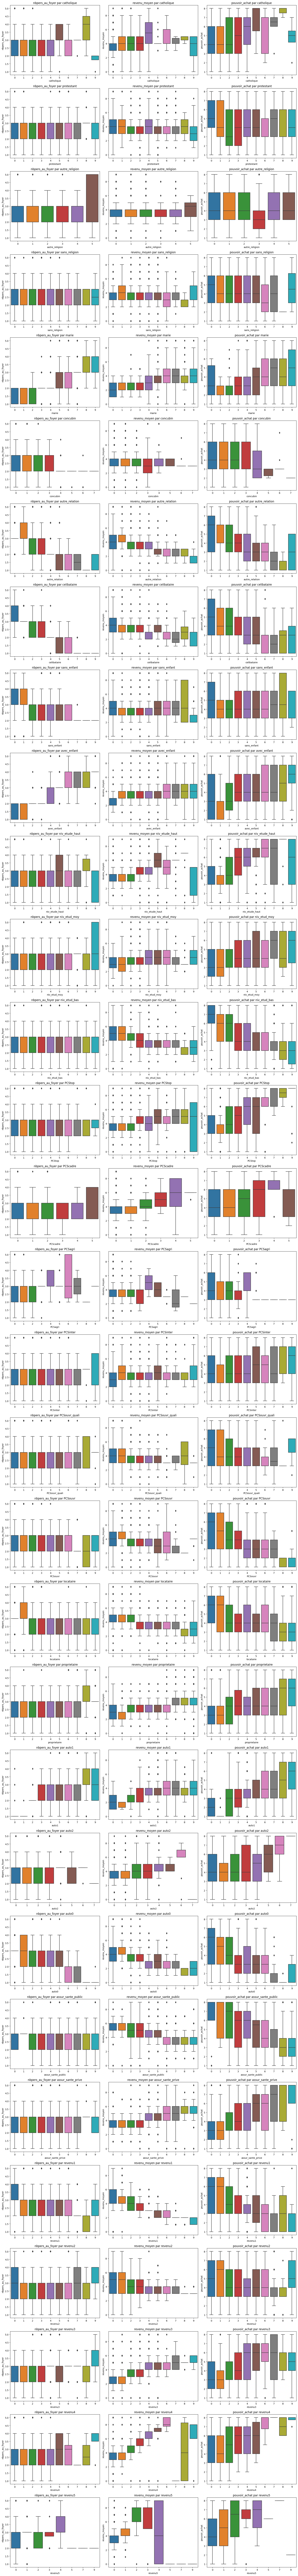

In [23]:
# Subplots pour les boxplots
n = len(cat_var) * len(num_var)  # Nombre total de graphiques
cols = 3  # Nombre de colonnes
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

idx = 0
for cat in cat_var:
    for num in num_var:
        if idx >= len(axes):
            break
        ax = axes[idx]
        sns.boxplot(data=df, x=cat, y=num, ax=ax)
        ax.set_title(f"{num} par {cat}")
        ax.set_ylabel(num)
        ax.set_xlabel(cat)
        idx += 1

# Supprime les axes inutilisés si le nombre de graphiques est inférieur aux subplots
for j in range(idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
